In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df_pokemon = pd.read_csv('Dataset_3/pokemon.csv')
display(df_pokemon.info())
display(df_pokemon.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          799 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


None

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
df_combats = pd.read_csv('Dataset_3/combats.csv')
display(df_combats.head())

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
df_tests = pd.read_csv('Dataset_3/tests.csv')
display(df_tests.head())

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [96]:
df_all = pd.DataFrame()
for i in range(len(df_combats['First_pokemon'])):
    id_1 = df_combats['First_pokemon'][i]
    id_2 = df_combats['Second_pokemon'][i]
    df_index = pd.DataFrame({
        'Pokemon1' : [id_1],
        'Pokemon2' : [id_2],
        'HP1' : df_pokemon[df_pokemon['#'] == id_1]['HP'].values,
        'Attack1' : df_pokemon[df_pokemon['#'] == id_1]['Attack'].values,
        'Defense1' : df_pokemon[df_pokemon['#'] == id_1]['Defense'].values,
        'Sp.Atk1' : df_pokemon[df_pokemon['#'] == id_1]['Sp. Atk'].values,
        'Sp.Def1' : df_pokemon[df_pokemon['#'] == id_1]['Sp. Def'].values,
        'Speed1' : df_pokemon[df_pokemon['#'] == id_1]['Speed'].values,
        'HP2' : df_pokemon[df_pokemon['#'] == id_2]['HP'].values,
        'Attack2' : df_pokemon[df_pokemon['#'] == id_2]['Attack'].values,
        'Defense2' : df_pokemon[df_pokemon['#'] == id_2]['Defense'].values,
        'Sp.Atk2' : df_pokemon[df_pokemon['#'] == id_2]['Sp. Atk'].values,
        'Sp.Def2' : df_pokemon[df_pokemon['#'] == id_2]['Sp. Def'].values,
        'Speed2' : df_pokemon[df_pokemon['#'] == id_2]['Speed'].values,
        'Winner' : df_combats['Winner']
    }, index = [i])
    
    df_all = pd.concat([df_all, df_index], axis = 0)

In [97]:
df_all.head()

,Pokemon1,Pokemon2,HP1,Attack1,Defense1,Sp.Atk1,Sp.Def1,Speed1,HP2,Attack2,Defense2,Sp.Atk2,Sp.Def2,Speed2,Winner
0,266,298,50,64,50,45,50,41,70,70,40,60,40,60,298
1,702,701,91,90,72,90,129,108,91,129,90,72,90,108,701
2,191,668,55,40,85,80,105,40,75,75,75,125,95,40,668
3,237,683,40,40,40,70,40,20,77,120,90,60,90,48,683
4,151,231,70,60,125,115,70,55,20,10,230,10,230,5,151


In [176]:
df_all['Winner'][0]
df_all['Pokemon1'][0]

266

In [177]:
for j in range(len(df_all)):
    if df_all['Winner'][j] == df_all['Pokemon1'][j]:
        df_all['Winner_Encode'][j] = 0
    if df_all['Winner'][j] == df_all['Pokemon2'][j]:
        df_all['Winner_Encode'][j] = 1
display(df_all.head())

,Pokemon1,Pokemon2,HP1,Attack1,Defense1,Sp.Atk1,Sp.Def1,Speed1,HP2,Attack2,Defense2,Sp.Atk2,Sp.Def2,Speed2,Winner,Winner_Encode
0,266,298,50,64,50,45,50,41,70,70,40,60,40,60,298,1
1,702,701,91,90,72,90,129,108,91,129,90,72,90,108,701,1
2,191,668,55,40,85,80,105,40,75,75,75,125,95,40,668,1
3,237,683,40,40,40,70,40,20,77,120,90,60,90,48,683,1
4,151,231,70,60,125,115,70,55,20,10,230,10,230,5,151,0


In [178]:
# df_all.to_csv('df_all.csv')

In [181]:
X = df_all.drop(['Pokemon1', 'Pokemon2', 'Winner', 'Winner_Encode'], axis = 1)
display(X.head())

,HP1,Attack1,Defense1,Sp.Atk1,Sp.Def1,Speed1,HP2,Attack2,Defense2,Sp.Atk2,Sp.Def2,Speed2
0,50,64,50,45,50,41,70,70,40,60,40,60
1,91,90,72,90,129,108,91,129,90,72,90,108
2,55,40,85,80,105,40,75,75,75,125,95,40
3,40,40,40,70,40,20,77,120,90,60,90,48
4,70,60,125,115,70,55,20,10,230,10,230,5


In [182]:
y = df_all['Winner_Encode']
display(y.head())

0    1
1    1
2    1
3    1
4    0
Name: Winner_Encode, dtype: int64

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [207]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear',multi_class='auto')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
print('Accuracy = {}'.format(round(log_reg.score(X_test, y_test) * 100, 2)))

Accuracy = 89.33


In [209]:
pred = log_reg.predict([[
    45, 49, 49, 65, 65, 45,
    60, 62, 63, 80, 80, 60
]])[0]
pred

1

In [210]:
prob = log_reg.predict_proba([[
    45, 49, 49, 65, 65, 45,
    60, 62, 63, 80, 80, 60
]]).max()
prob = round(prob * 100, 2)
prob

80.51

In [211]:
import joblib
joblib.dump(log_reg,'model_pokemon_battle')

['model_pokemon_battle']

In [169]:
id_1 = input('Pokemon 1 = ')
id_2 = input('Pokemon 2 = ')

Pokemon 1 = Bulbasaur
Pokemon 2 = Ivysaur


In [170]:
df_1 = df_pokemon[df_pokemon['Name'] == id_1]
df_2 = df_pokemon[df_pokemon['Name'] == id_2]
df_gabung = pd.concat([df_1, df_2], axis = 0)

display(df_gabung)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False


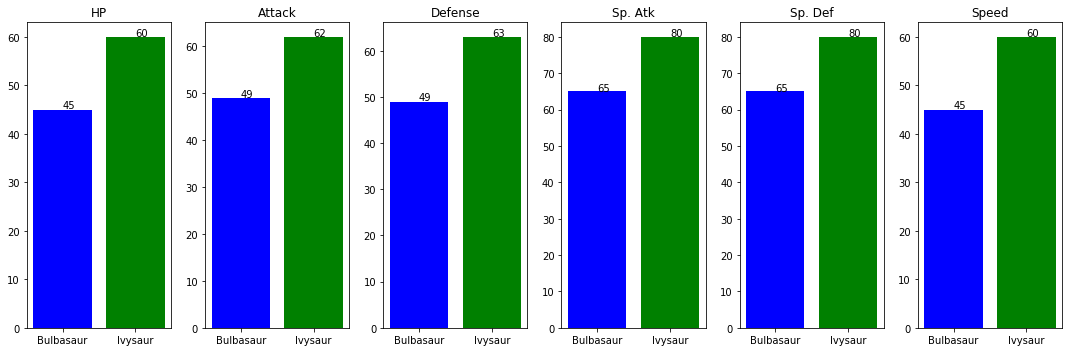

In [172]:
fig = plt.figure('Pokemon Stats', figsize = (15,5))

plt.subplot(161)
plt.bar(df_gabung['Name'], df_gabung['HP'], color = ('blue', 'green'))
plt.title('HP')
for i in range(len(df_gabung)):
    plt.text(df_gabung['Name'][i], df_gabung['HP'][i] + 0.2, df_gabung['HP'][i])

plt.subplot(162)
plt.bar(df_gabung['Name'], df_gabung['Attack'], color = ('blue', 'green'))
plt.title('Attack')
for i in range(len(df_gabung)):
    plt.text(df_gabung['Name'][i], df_gabung['Attack'][i] + 0.2, df_gabung['Attack'][i])

plt.subplot(163)
plt.bar(df_gabung['Name'], df_gabung['Defense'], color = ('blue', 'green'))
plt.title('Defense')
for i in range(len(df_gabung)):
    plt.text(df_gabung['Name'][i], df_gabung['Defense'][i] + 0.2, df_gabung['Defense'][i])

plt.subplot(164)
plt.bar(df_gabung['Name'], df_gabung['Sp. Atk'], color = ('blue', 'green'))
plt.title('Sp. Atk')
for i in range(len(df_gabung)):
    plt.text(df_gabung['Name'][i], df_gabung['Sp. Atk'][i] + 0.2, df_gabung['Sp. Atk'][i])

plt.subplot(165)
plt.bar(df_gabung['Name'], df_gabung['Sp. Def'], color = ('blue', 'green'))
plt.title('Sp. Def')
for i in range(len(df_gabung)):
    plt.text(df_gabung['Name'][i], df_gabung['Sp. Def'][i] + 0.2, df_gabung['Sp. Def'][i])

plt.subplot(166)
plt.bar(df_gabung['Name'], df_gabung['Speed'], color = ('blue', 'green'))
plt.title('Speed')
for i in range(len(df_gabung)):
    plt.text(df_gabung['Name'][i], df_gabung['Speed'][i] + 0.2, df_gabung['Speed'][i])

plt.tight_layout()
plt.savefig('Pokemon Battle Stats');